In [2]:
##### Task 1: Data Pre-processing

### 1. Import the dataset irismissing.csv into a data frame and find the row number of each instance that has missing values.

import pandas as pd
import numpy as np

irismissing = pd.read_csv('irismissing.csv') # Import the dataset irismissing.csv into a data frame using pandas package
null_data = irismissing[irismissing.isnull().any(axis=1)] # df.isnull() returns dataframe after assigning True for missing values and any(axis=1) checking for at least one True per row
print(null_data.index.values) # Print the row numbers of null_data

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            NaN           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           NaN            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

In [8]:
### 2. Write a program to drop missing values, and describe other two strategies (median, mean) for handling missing values and write a function to implement these strategies.

import numpy as np

# Drop rows of missing values
strategy_dropNA = irismissing.dropna()
print(strategy_dropNA)

# Median: A new dataframe with median filling in missing values
strategy_median = irismissing.fillna(irismissing.median())
print(strategy_median)
print(strategy_median.isnull().sum()) # Check that all columns indeed have 0 missing values left

# Mean: A new dataframe with mean filling in missing values
strategy_mean = irismissing.fillna(irismissing.mean())
print(strategy_mean)
print(strategy_mean.isnull().sum()) # Check that all columns indeed have 0 missing values left

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            4.3           3.0            1.1           0.1   
14    15            5.8           4.0            1.2           0.2   
15    16            

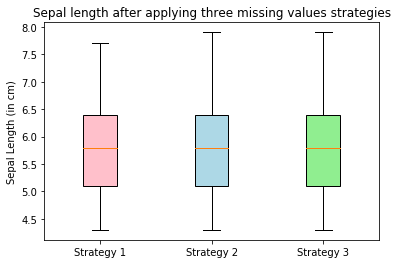

In [19]:
### 3. Compare the results of applying each missing value strategy using some visualization method.

import matplotlib.pyplot as plt

data1 = [strategy_dropNA['SepalLengthCm'], strategy_median['SepalLengthCm'], strategy_mean['SepalLengthCm']]
#data2 = [strategy_dropNA['SepalWidthCm'], strategy_median['SepalWidthCm'], strategy_mean['SepalWidthCm']]
#data3 = [strategy_dropNA['PetalLengthCm'], strategy_median['PetalLengthCm'], strategy_mean['PetalLengthCm']]
#data4 = [strategy_dropNA['PetalWidthCm'], strategy_median['PetalWidthCm'], strategy_mean['PetalWidthCm']]

graph1 = plt.boxplot(data1, patch_artist=True, labels=['Strategy 1','Strategy 2','Strategy 3'])
plt.title("Sepal length after applying three missing values strategies")
plt.ylabel("Sepal Length (in cm)")

colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(graph1['boxes'], colors):
    patch.set_facecolor(color)

In [3]:
##### Task 2: Decision Trees

### 1. Manually generate the decision tree for the passenger survival dataset below. Use information gain as the split measure.

import pandas as pd
import numpy as np
import math

# Import the dataset Passanger Survival.xlsx into a data frame using pandas package
dataPassengerSurvival = pd.read_excel('Passenger Survival.xlsx') 
print(dataPassengerSurvival)
### ----------------------------------------------------------------------------------------------

## Functions
# Function to calculate the total frequency of a certain attribute
def calcFreq(listAttributeType):
    freq = 0
    for i in listAttributeType:
        freq = freq + i
    return freq

# Function to calculate probability of each type of attributes
def calcProb(dataset,classifier):
    listAttrType = np.unique(dataset[classifier]) # get a list of types of the attributes
    listAttrProb = []
    for x in listAttrType:
        subdataset = dataset[dataset[classifier]==x] # get sub-dataset containing only each type of attribute
        subprob = calcFreq(subdataset['Freq'])/calcFreq(dataset['Freq']) # divide the freq of "Attribute == type"
                                                                         #over the frequency of total Attribute
        listAttrProb.append(subprob)
    return listAttrProb

# Function to calculate entropy
def calcEnt(dataset,classifier):
    ent = 0.0
    for prob in calcProb(dataset,classifier):
        ent = ent + prob * math.log(prob, 2) # log base 2
    return -ent

# Function to calculate information gain
def IG(dataset,A):
    
    # Make a list of entropy E(S1), E(S2), ... E(Sn)
    listAttrType = np.unique(dataset[A]) # get a list of types of the attributes
    listEnt = []
    for x in listAttrType:
        subdataset = dataset[dataset[A]==x] # get sub-dataset containing in which "Attribute == type"
        ent = calcEnt(subdataset, 'Survived')
        listEnt.append(ent)
    
    # Make a list of probability P1, P2, ..., Pn
    listProb = calcProb(dataset,A)
    
    # Sum of sub-entropy
    subEnt = 0.0
    for i in range(len(listEnt)):
        subEnt = subEnt + listProb[i]*listEnt[i] # Pi*Ent(Si)
    
    IG = calcEnt(dataset,'Survived') - subEnt # main entropy - sum of sub-entropy
    return IG

### ----------------------------------------------------------------------------------------------

## Results of information gain for each attribute

print(IG(dataPassengerSurvival, 'Class'))
print(IG(dataPassengerSurvival, 'Sex')) # --> highest IG, so become root node
print(IG(dataPassengerSurvival, 'Age'))

   Class     Sex    Age Survived  Freq
0    1st    Male  Child       No     0
1    2nd    Male  Child       No     0
2    3rd    Male  Child       No    25
3    1st  Female  Child       No     0
4    2nd  Female  Child       No     0
5    3rd  Female  Child       No    37
6    1st    Male  Adult       No   108
7    2nd    Male  Adult       No   164
8    3rd    Male  Adult       No   367
9    1st  Female  Adult       No     4
10   2nd  Female  Adult       No    13
11   3rd  Female  Adult       No    99
12   1st    Male  Child      Yes     3
13   2nd    Male  Child      Yes    11
14   3rd    Male  Child      Yes    13
15   1st  Female  Child      Yes     1
16   2nd  Female  Child      Yes    13
17   3rd  Female  Child      Yes    29
18   1st    Male  Adult      Yes    53
19   2nd    Male  Adult      Yes    14
20   3rd    Male  Adult      Yes    75
21   1st  Female  Adult      Yes   180
22   2nd  Female  Adult      Yes    60
23   3rd  Female  Adult      Yes    96
0.08122494499417288
0.190

In [ ]:
##### Task 3: ID3 Algorithm

def ID3(dataset, classifier, attrNames):
    valueUnique = dataset[classifier].unique()
    classDefault = None
    
    # Condition 1: Homogeneous dataset
    if len(valueUnique) == 1:
        return next(iter(valueUnique)) # Next input dataset, or raises StopIteration when EOF is hit
    
    # Condition 2: Empty dataset
    elif dataset.empty or (not attrNames):
        return classDefault # Return None for empty dataset
    
    # Condition 3: Main part
    else:
        Npos = calcFreq(dataset[dataset[classifier] == "Yes"][classifier])
        Nneg = calcFreq(dataset[dataset[classifier] == "No"][classifier])
        
        # Return majority value in Classifier
        if(Npos>Nneg):
            classDefault = Npos
        else:
            classDefault = Nneg
        
        # IG for each attribute:
        listIG = []
        for attr in attrNames:
            listIG.append(IG(dataset,attr))
        
        # Choose highest attribute to split on
        indexMax = listIG.index(max(listIG)) # Index of best attribute
        attrMax = attrNames[indexMax]
        attrNames.remove(attrMax) # Remove the best attribute from the attribute list
        
        # Create an empty tree, soon to be populated
        tree = {attrMax:{}} # Initiate the tree with the best attribute as a node
        
        for attrType, dataSubset in dataset.groupby(attrMax):
            subtree = ID3(dataSubset, classifier, attrNames)
            tree[attrMax][attrType] = subtree
        return tree

from pprint import pprint

dfTennisData = pd.read_excel('Tennis data.xlsx') 
A = ['Outlook','Temperature','Humidity','Wind']

treeID3 = ID3(dfTennisData, 'PlayTennis', A)
pprint(treeID3)

In [7]:
dataFemale = dataPassengerSurvival[dataPassengerSurvival['Sex']=='Female']

femaleClass1 = dataFemale[dataFemale['Class']=='1st']
femaleClass2 = dataFemale[dataFemale['Class']=='2nd']
femaleClass3 = dataFemale[dataFemale['Class']=='3rd']

femaleChild = dataFemale[dataFemale['Age']=='Child']
femaleAdult = dataFemale[dataFemale['Age']=='Adult']

print(calcEnt(femaleClass1,'Survived'))
print(calcEnt(femaleClass2,'Survived'))
print(calcEnt(femaleClass3,'Survived'))

print(calcEnt(femaleChild,'Survived'))
print(calcEnt(femaleAdult,'Survived'))

0.15045116018085175
0.6127425554686624
0.9987183260993595
0.9959386076315955
0.8216292954053164


In [5]:
dataMale = dataPassengerSurvival[dataPassengerSurvival['Sex']=='Male']
print(IG(dataMale,'Class'))
print(IG(dataMale,'Age'))

dataFemale = dataPassengerSurvival[dataPassengerSurvival['Sex']=='Female']
print(IG(dataFemale,'Class'))
print(IG(dataFemale,'Age'))
print(dataFemale)

0.02136387471797685
0.02395741115102923
0.2242493003235302
0.017751701417448862
   Class     Sex    Age Survived  Freq
3    1st  Female  Child       No     0
4    2nd  Female  Child       No     0
5    3rd  Female  Child       No    37
9    1st  Female  Adult       No     4
10   2nd  Female  Adult       No    13
11   3rd  Female  Adult       No    99
15   1st  Female  Child      Yes     1
16   2nd  Female  Child      Yes    13
17   3rd  Female  Child      Yes    29
21   1st  Female  Adult      Yes   180
22   2nd  Female  Adult      Yes    60
23   3rd  Female  Adult      Yes    96


In [ ]:
##### Task 2.2: Tennis data

### 1. Write a function that computes the entropy of a set S with 𝑁𝑝𝑜𝑠 positive observations and 𝑁𝑛𝑒𝑔 negative observations.
